In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_csv('International_Report_Departures.csv')
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930808 entries, 0 to 930807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      930808 non-null  object
 1   Year          930808 non-null  int64 
 2   Month         930808 non-null  int64 
 3   usg_apt_id    930808 non-null  int64 
 4   usg_apt       930808 non-null  object
 5   usg_wac       930808 non-null  int64 
 6   fg_apt_id     930808 non-null  int64 
 7   fg_apt        930808 non-null  object
 8   fg_wac        930808 non-null  int64 
 9   airlineid     930808 non-null  int64 
 10  carrier       927753 non-null  object
 11  carriergroup  930808 non-null  int64 
 12  type          930808 non-null  object
 13  Scheduled     930808 non-null  int64 
 14  Charter       930808 non-null  int64 
 15  Total         930808 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 113.6+ MB


In [8]:
df.isnull().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [9]:
df["carrier"].fillna(df["carrier"].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

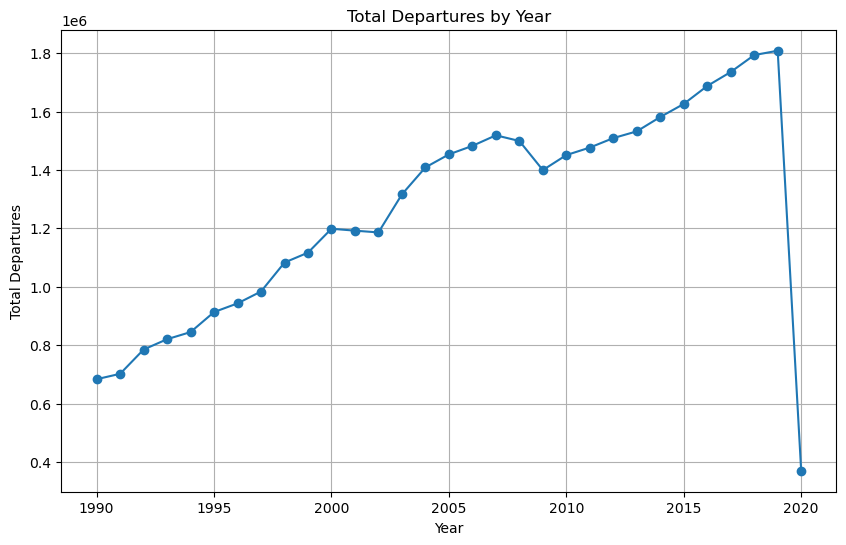

In [11]:
# Group by year and sum the total departures
yearly_departures = df.groupby('Year')['Total'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_departures.index, yearly_departures.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Departures')
plt.title('Total Departures by Year')
plt.grid()
plt.show()

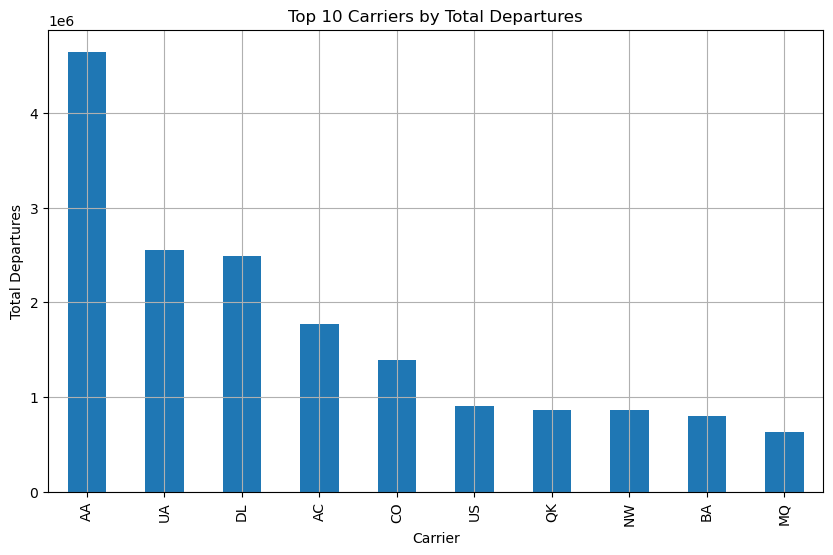

In [12]:
# Group by carrier and sum the total departures
carrier_departures = df.groupby('carrier')['Total'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
carrier_departures.plot(kind='bar')
plt.xlabel('Carrier')
plt.ylabel('Total Departures')
plt.title('Top 10 Carriers by Total Departures')
plt.grid()
plt.show()

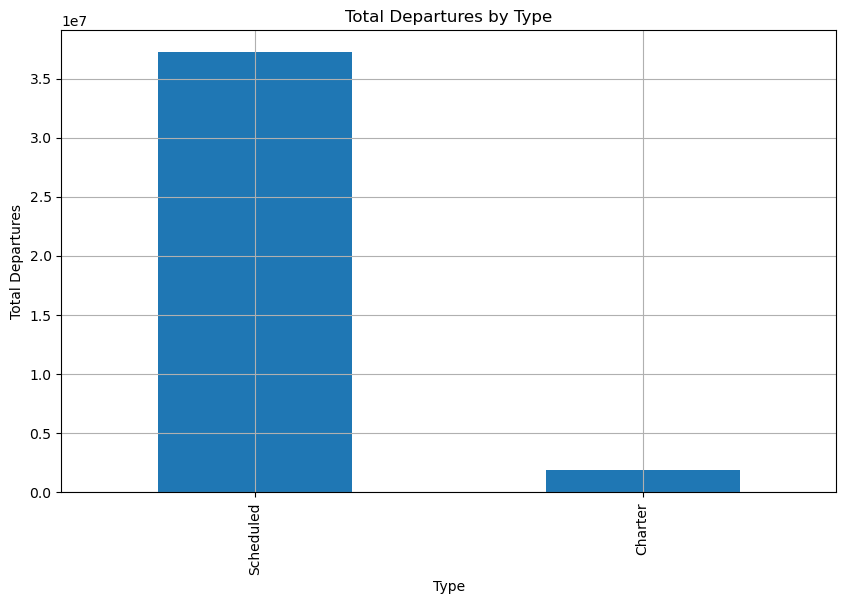

In [13]:
# Sum the total departures by type
type_departures = df[['Scheduled', 'Charter']].sum()

# Plot
plt.figure(figsize=(10, 6))
type_departures.plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Total Departures')
plt.title('Total Departures by Type')
plt.grid()
plt.show()

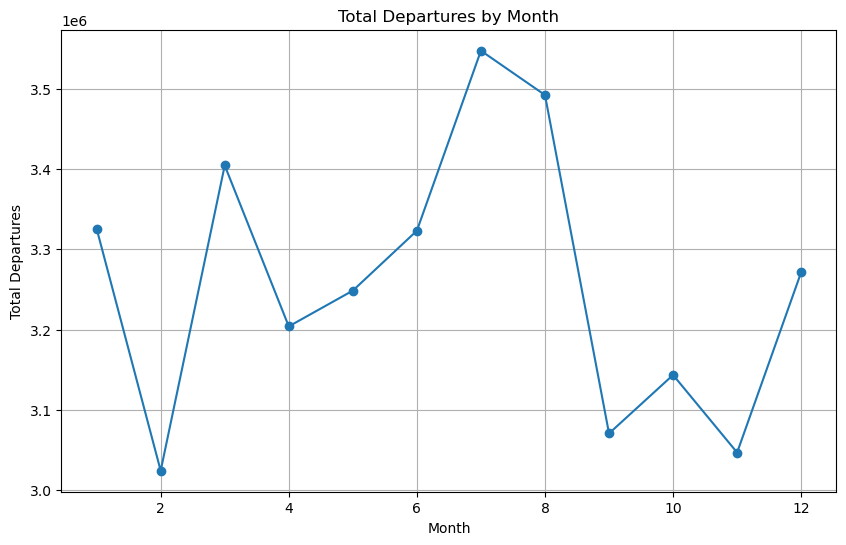

In [14]:
# Group by month and sum the total departures
monthly_departures = df.groupby('Month')['Total'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_departures.index, monthly_departures.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Departures')
plt.title('Total Departures by Month')
plt.grid()
plt.show()

array([[<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

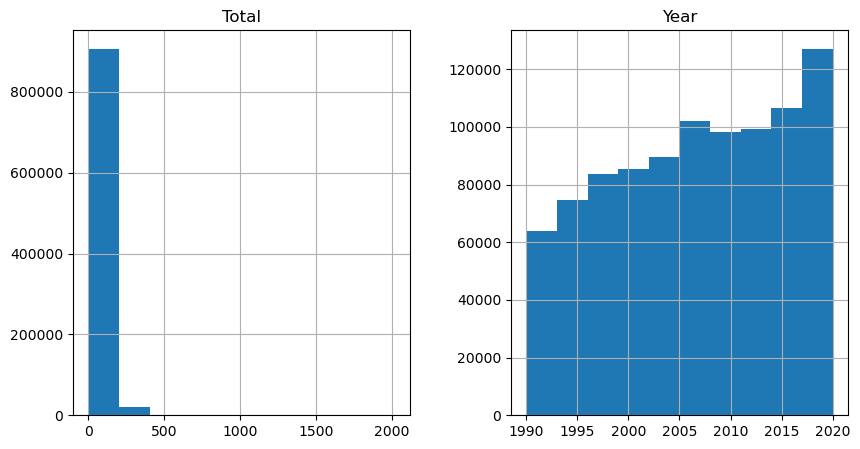

In [19]:
features=["Total","Year"]
df[features].hist(figsize=(10,5))

<Axes: xlabel='Month', ylabel='Year'>

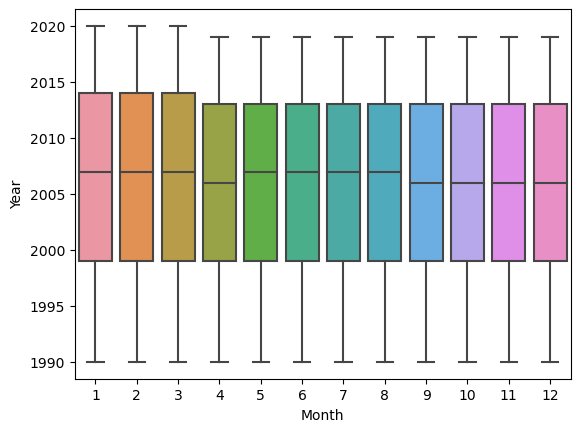

In [42]:
sns.boxplot(x='Month', y='Year', data=df)

In [45]:
df2=df.head(20)
df2

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
5,10/01/2007,2007,10,14761,SFB,33,11928,GLA,493,20444,JN,0,Departures,0,8,8
6,02/01/2002,2002,2,14100,PHL,23,11032,CUN,148,20402,MMQ,1,Departures,0,1,1
7,02/01/2008,2008,2,16091,YIP,43,16166,YQG,936,20201,AMQ,1,Departures,0,3,3
8,11/01/2001,2001,11,13930,ORD,41,16042,YEG,916,19531,AC,0,Departures,0,1,1
9,07/01/2003,2003,7,13198,MCI,64,13514,MTY,148,20201,AMQ,1,Departures,0,1,1


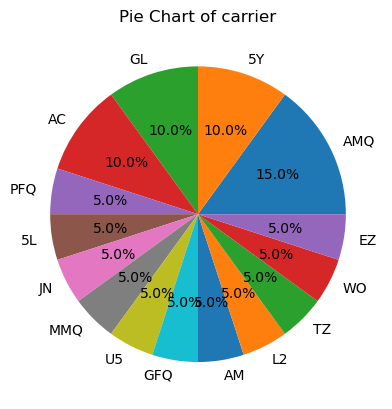

In [52]:
def pie_chart(df2, column):
    # Get the value counts of the column
    counts = df2[column].value_counts()
    
    # Create a pie chart
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')
    plt.show()

# Test the function
pie_chart(df2, 'carrier')